# 0. Imports 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# 1. Loading Data 

In [42]:
df_client_train = pd.read_csv('dataset/client_train.csv', low_memory=False)
df_client_test = pd.read_csv('dataset/client_test.csv', low_memory=False)
df_invoice_train = pd.read_csv('dataset/invoice_train.csv', low_memory=False)
df_invoice_test = pd.read_csv('dataset/invoice_test.csv', low_memory=False)

# 2. Data Description


## 2.1 Data Dimensions 

In [43]:
print(f'df_client_train (lines = {df_client_train.shape[0]}, cols = {df_client_train.shape[1]})')

df_client_train (lines = 135493, cols = 6)


In [44]:
print(f'df_client_test (lines = {df_client_test.shape[0]}, cols = {df_client_test.shape[1]})')

df_client_test (lines = 58069, cols = 5)


In [45]:
print(f'df_invoice_train (lines = {df_invoice_train.shape[0]}, cols = {df_invoice_train.shape[1]})')

df_invoice_train (lines = 4476749, cols = 16)


In [46]:
print(f'df_invoice_test (lines = {df_invoice_test.shape[0]}, cols = {df_invoice_test.shape[1]})')

df_invoice_test (lines = 1939730, cols = 16)


## 2.2 Data Types 

In [47]:
print('df_client_train')
print('---------------')
df_client_train.dtypes

df_client_train
---------------


disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [48]:
print('df_client_test')
print('---------------')
df_client_test.dtypes

df_client_test
---------------


disrict           int64
client_id        object
client_catg       int64
region            int64
creation_date    object
dtype: object

In [49]:
print('df_invoice_train')
print('---------------')
df_invoice_train.dtypes

df_invoice_train
---------------


client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

In [50]:
print('df_invoice_test')
print('---------------')
df_invoice_test.dtypes

df_invoice_test
---------------


client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue           int64
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

## 2.3 Checkin NA 

In [51]:
df_client_train.isna().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [52]:
df_client_test.isna().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
dtype: int64

In [53]:
df_invoice_train.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [54]:
df_invoice_test.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

## 2.4 Changing Types 

In [57]:
# From object to datetime
df_client_train.creation_date = pd.to_datetime(df_client_train.creation_date, format='dd/mm/yyyy')
df_client_test.creation_date = pd.to_datetime(df_client_test.creation_date,format='dd/mm/yyyy')

In [58]:
df_client_train.dtypes

disrict                   int64
client_id                object
client_catg               int64
region                    int64
creation_date    datetime64[ns]
target                  float64
dtype: object

In [62]:
# From object to datetime
df_invoice_train.invoice_date = pd.to_datetime(df_invoice_train.invoice_date)
df_invoice_test.invoice_date = pd.to_datetime(df_invoice_test.invoice_date)

In [63]:
df_invoice_train.dtypes

client_id                       object
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

## 2.5 Basic Descriptive Statistics 

### 2.5.1 Clients 

In [71]:
df_client_train.columns.tolist()

['disrict', 'client_id', 'client_catg', 'region', 'creation_date', 'target']

In [79]:
df_client_train.value_counts(subset='target', normalize=True)

target
0.0    0.944159
1.0    0.055841
dtype: float64

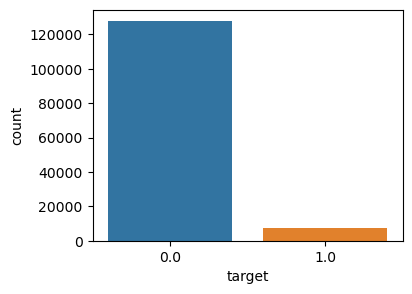

In [84]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_client_train, x='target');

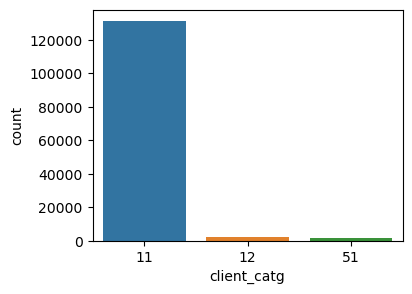

In [87]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_client_train, x='client_catg');

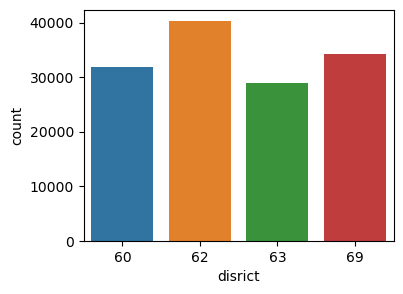

In [89]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_client_train, x='disrict');

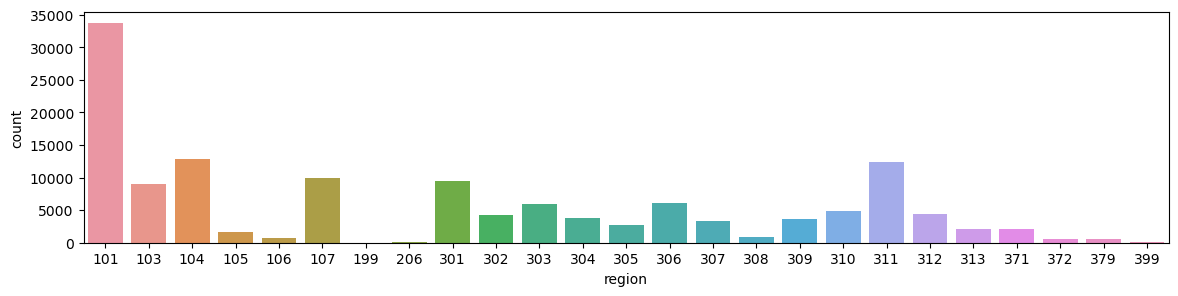

In [86]:
plt.figure(figsize=(14,3))
sns.countplot(data=df_client_train, x='region');

In [70]:
df_client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


### 2.5.2 Invoice 

In [90]:
df_invoice_train.columns.tolist()

['client_id',
 'invoice_date',
 'tarif_type',
 'counter_number',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'counter_coefficient',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'old_index',
 'new_index',
 'months_number',
 'counter_type']

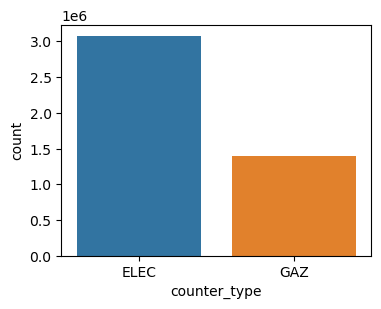

In [94]:
plt.figure(figsize=(4,3));
sns.countplot(data=df_invoice_train, x='counter_type');

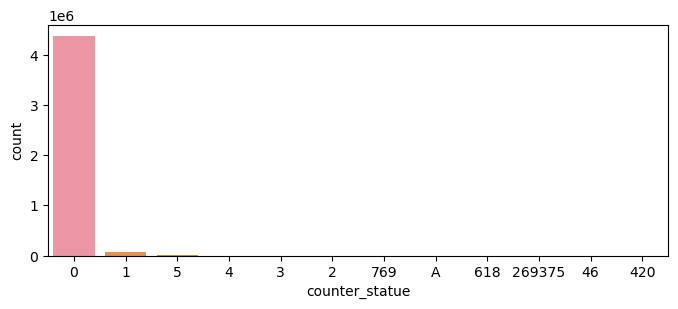

In [100]:
plt.figure(figsize=(8,3));
sns.countplot(data=df_invoice_train, x='counter_statue');

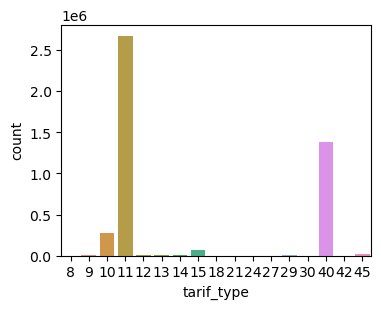

In [96]:
plt.figure(figsize=(4,3));
sns.countplot(data=df_invoice_train, x='tarif_type');

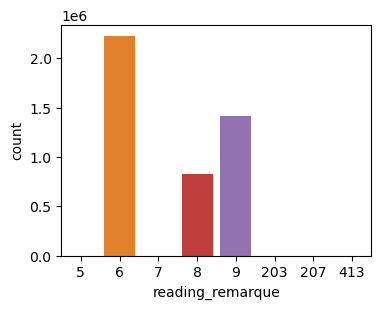

In [98]:
plt.figure(figsize=(4,3));
sns.countplot(data=df_invoice_train, x='reading_remarque');

In [69]:
df_invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


## 2.6 Main Conclusions

- A maioria dos dados é referente ao consumo de energia elétrica
- A frequencia com que os clientes é cobrado pode ser variável

# 3. Feature Engineering 

# 4. Filtering Variables 

# 5. Exploratory Data Analysis 

# 6. Data Preparation 

# 7. Feature Selection 

# 8. Machine Learning Modeling 

# 9. Fine Tuning 

# 10. Cross-validation 